# Final Project: Lập trình cho khoa học dữ liệu

## Github: https://github.com/binhnam2907/P4DS-Final_Project

## Thông tin nhóm:

#### Nhóm: 12

- Số lượng thành viên: 1
    - Thành viên 1:
        - Họ và tên: Lê Nguyễn Bình Nam
        - MSSV: 20127567
        - Email: 20127567@student.hcmus.edu.vn

## Thông tin đồ án:

### Thư viện sử dụng:

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import country_converter as coco

### 1. Tổng quan dữ liệu & tiền xử lý:

- "Salary for Data Science jobs" là một trong những vấn để đang nóng với mọi người, cụ thể là những người làm trong lĩnh vực Data cũng như các ngành nghề liên quan.
- Dữ liệu được thu thập bằng cách lấy dữ liệu khi người dùng điền thông tin vào trang web https://salaries.ai-jobs.net/. Mỗi dòng trong bộ dữ liệu này tương ứng với một bản ghi của người dùng đã điền vào biểu mẫu. Mỗi dòng chứa thông tin về thu nhập của người dùng trong một năm cụ thể, vị trí công việc, kinh nghiệm, quốc gia, loại công việc, v.v.

In [36]:
data = pd.read_csv('ds_salaries.csv', index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [37]:
num_rows, num_cols = data.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 607
Number of columns: 11


- Dữ liệu có 607 dòng tương ứng với 607 người cụ thể.
- Dữ liệu gồm có 11 cột, mô tả chi tiết:
    - work_year: Năm trả lương (Trong tập dữ liệu của ta chỉ xét trong 3 năm 2020, 2021, 2022)
    - experience_level: Mức độ kinh nghiệm của cá nhân trong lĩnh vực, được cho theo tiêu chuẩn sau:
        - EN = Entry-level / Junior;
        - MI = Mid-level / Intermediate;
        - SE = Senior-level / Expert;
        - EX = Executive-level / Director
    - employment_type: Thời gian làm việc hiện tại cho công ty:
        - PT = Part-time;
        - FT = Full-time;
        - CT = Contract;
        - FL = Freelance;
    - job_title: Vai trò trong công ty.
    - salary: Mức lương được trả.
    - salary_currency: Đơn vị tiền tệ của tiền lương được trả theo mã đơn vị tiền tệ ISO 4217.
    - salary_in_usd: Mức lương được trả khi quy ra đơn vị usd.
    - employee_residence: Mã ghi tắt quốc gia đang làm việc theo chuẩn ISO 3166 country code(Alpha-2 code).
    - remote_ratio: Phân loại nhân viên có làm từ xa hay không, theo chuẩn mẫu:
        - 0 = Làm tại công ty chính (less than 20%);
        - 50 = Một nửa từ xa một nửa tại công ty
        - 100 = Làm từ xa hoàn toàn (more than 80%)
    - company_location: Vị trí của công ty chính được viết theo chuẩn ISO 3166 country code(Alpha-2 code).
    - company_size: Số lượng người trung bình làm cho công ty mỗi năm:
        - S = Ít hơn 50 người (small);
        - M = Từ 50 tới 250 người (medium);
        - L = Hơn 250 người (large)

### Kiểm tra sự trùng lặp:

In [38]:
duplicated = data.duplicated().sum()
duplicated

42

-  Hiện tại dữ liệu có 42 giá trị trùng lắp. Tuy nhiên ta không được loại bỏ nó ra khỏi tập dữ liệu để đảm bảo tính khách quan của dữ liệu. Có thể có 2 người cùng công ty cùng vị trí cùng điền vào dẫn đến tình trạng lặp.

### Kiểu dữ liệu của từng cột:

In [39]:
col_type = data.dtypes
col_type

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

- Đa số dữ liệu đều mang format đúng với yêu cầu.
- Cột dữ liệu **remote_ratio** nên chuyển thành dữ liệu phân lớp.

In [40]:
data.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
data['remote_ratio']=data['remote_ratio'].astype(object)

- Ta tiến hành xem thử giá trị trong cột **job_title**: 

In [41]:
set(data['job_title'])

{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Manager',
 'Data Scientist',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of Data Science',
 'Head of Machine Learning',
 'Lead Data Analyst',
 'Lead Data Engineer',
 'Lead Data Scientist',
 'Lead Machine Learning Engineer',
 'ML Engineer',
 'Machine Learning Developer',
 'Machine Learning Engineer',
 'Machine Lear

- Nhận xét: 
    - Có rất nhiều tên công việc (50+ categories).
    - Có những loại công việc có thể đưa vào chung một trường chung: 
        - Ví dụ: Financial Data Analyst, Product Data Analyst, Business Data Analyst, ... có thể gọi chung là Data Analyst. 
        - Ví dụ: Cloud Data Architect, Principal Data Architect, Big Data Architect',... có thể được gọi là Data Architect.
    - Một số công việc có thể chung chức năng nhưng tên gọi được nhập khác nhau:
        - Ví dụ: Machine Learning Engineer và ML Engineer có thể được hiểu như Machine Learning Engineer.
        - Ví dụ: Financial Data Analyst và Finance Data Analyst.
- Giải pháp: 
    - Ta có thể chuyển chúng về dạng thống nhất gồm các nhóm ngành cơ bản (vì tập các nhóm ngành ít nên ta có thể làm như này):
        - Data Scientist
        - Data Engineer
        - Data Analyst
        - Data Architect
        - Machine Learning Engineer
        - Machine Learning Scientist
        - Computer Vision Engineer
        - NLP Engineer
        - Research Scientist
        - AI Scientist
        - Applied Scientist

In [42]:
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',
                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',
                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',
                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',                            
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',
                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',
                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

data["job_title"] = data["job_title"].map(employment_classification)

- Kiểm tra lại: 

In [43]:
set(data['job_title'])

{'AI Scientist',
 'Computer Vision Engineer',
 'Data Analyst',
 'Data Architect',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Machine Learning Scientist',
 'NLP Engineer',
 'Research Scientist'}

### Xử lý những cột mang giá trị số:

In [44]:
col_type = data.dtypes
col_type

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

- Chỉ có 3 cột **work_year, salary, salary_in_usd** mang giá trị số, ta sẽ tiến hành lấy 3 cột giá trị này ra và tính một vài thông số thống kê cơ bản. Vì trong hàm describe() không hỗ trợ tỉ lệ thiếu dữ liệu nên ta tính riêng.

In [45]:
missing_ratio = data.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = (missing_ratio / num_rows)
missing_value_df = pd.DataFrame({'percent_missing': missing_ratio })

missing_value_df

,percent_missing
work_year,0.0
salary,0.0
salary_in_usd,0.0


In [46]:
numeric_info = data.describe().round(1)
numeric_info

,work_year,salary,salary_in_usd
count,607.0,607.0,607.0
mean,2021.4,324000.1,112297.9
std,0.7,1544357.5,70957.3
min,2020.0,4000.0,2859.0
25%,2021.0,70000.0,62726.0
50%,2022.0,115000.0,101570.0
75%,2022.0,165000.0,150000.0
max,2022.0,30400000.0,600000.0


- Các cột số không có giá trị bị thiếu, có thể là do cách thu thập thông tin thực sự hiệu quả từ trang web khi thu thập bằng cách yêu cầu những người tham gia khảo sát trên khắp thế giới điền vào biểu mẫu có một số thuộc tính. vừa phải và điền ẩn danh để người dùng có thể nhanh chóng điền thông tin cơ bản nhưng quan trọng như năm làm việc hoặc tiền lương.
- Sự khác biệt giữa giá trị tối thiểu và tối đa của cột lương là khá lớn do sự khác biệt về tiền tệ ở mỗi quốc gia. Do đó, việc có cột lương_in_usd là cần thiết cho quá trình trực quan hóa.
- Ta sẽ không tiến hành loại bỏ các outlier vì sẽ mất đi tính tổng quát của dữ liệu. Có thể tồn tại những cá thể có những chỉ số như vậy thì sao.

#### Tương quan giữa các cột số:

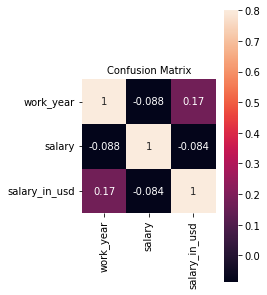

In [47]:
fig, ax = plt.subplots() 
fig.set_size_inches(3,5)
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True)
plt.title('Confusion Matrix',fontsize=10);

-  Các cột mang giá trị số không có tương quan, phụ thuộc vào nhau.

### Xử lý thông tin các cột không mang giá trị số:

- Thực hiện thống kê và lưu vào khung dữ liệu với các hàng biểu thị các giá trị sau:
    - Tỷ lệ phần trăm (từ 0 đến 100) của các giá trị bị thiếu (missing_ratio).
    - Số lượng giá trị khác nhau (không bao gồm giá trị bị thiếu) (num_values).
    - Tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần (không xét giá trị thiếu, tỷ lệ là tỷ lệ với số lượng giá trị không thiếu): dùng từ điển để lưu, key là giá trị, giá trị là tỷ lệ phần trăm (value_percentages).

In [48]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)

def different(list1, list2):
    return list(set(list1) - set(list2)) + list(set(list2) - set(list1))
def num_values(x):
    return x.str.split(';').explode().nunique()
def missing_percentage(x):
    return (x.isnull().sum() * 100 / len(x)).round(1)
def value_percentages(x):
    return x.str.split(';').explode().value_counts(normalize=True).apply(lambda x: x*100).round(1).to_dict()
# Only categorical attributes
cols_name = different(data.columns.tolist() , data.select_dtypes(include=np.number).columns.tolist())
# List of aggregate functions
rows_name = [missing_percentage, num_values, value_percentages]
# Aggregate
cate_col_info_df = data[cols_name].agg(rows_name)
cate_col_info_df

,salary_currency,company_size,employment_type,company_location,experience_level,employee_residence,remote_ratio,job_title
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,17,3,4,50,4,57,3,10
value_percentages,"{'USD': 65.6, 'EUR': 15.7, 'GBP': 7.2, 'INR': 4.4, 'CAD': 3.0, 'JPY': 0.5, 'PLN': 0.5, 'TRY': 0....","{'M': 53.7, 'L': 32.6, 'S': 13.7}","{'FT': 96.9, 'PT': 1.6, 'CT': 0.8, 'FL': 0.7}","{'US': 58.5, 'GB': 7.7, 'CA': 4.9, 'DE': 4.6, 'IN': 4.0, 'FR': 2.5, 'ES': 2.3, 'GR': 1.8, 'JP': ...","{'SE': 46.1, 'MI': 35.1, 'EN': 14.5, 'EX': 4.3}","{'US': 54.7, 'GB': 7.2, 'IN': 4.9, 'CA': 4.8, 'DE': 4.1, 'FR': 3.0, 'ES': 2.5, 'GR': 2.1, 'JP': ...","{'Fully Remote': 62.8, 'On-site': 20.9, 'Partially Remote': 16.3}","{'Data Scientist': 31.5, 'Data Engineer': 26.4, 'Data Analyst': 23.4, 'Machine Learning Engineer..."


### 2. Đưa ra câu hỏi và trả lời:

#### a. Xu hướng của ngành Data cũng như các nhóm ngành nhỏ bên trong như thế nào?

- Ý nghĩa:
    - Sự thay đổi mức lương của ngành data.
    - Đưa ra được xu hướng nghề nghiệp hiện nay (nghề nào được trả lương cao, thay đổi mức lương giữa các năm của các ngành nghề).

- Các bước trả lời câu hỏi:\
    - Tính trung bình lương ngành data theo từng năm và biểu diễn bởi đồ thị đường đơn.
    - Với mỗi năm (2020, 2021, 2022) ta lấy ra cột **job_title, salary_in_usd**.
    - Với 2 cột, ta tính giá trị trung bình của cột **salary_in_usd** của từng các thành phần trong cột **job_title** theo thứ tự cố định trong **name_job**. Với mỗi giá trị trong **name_job** mà không tồn tại trong **job_title**, ta coi như trong bình của nó là 0. Kết thúc hàm trả về giá trị trung bình của **name_job** ứng với mỗi năm.
    - Biểu diễn các giá trị theo biểu đồ đường với 3 đường 3 màu khác nhau tương ứng với 3 năm.

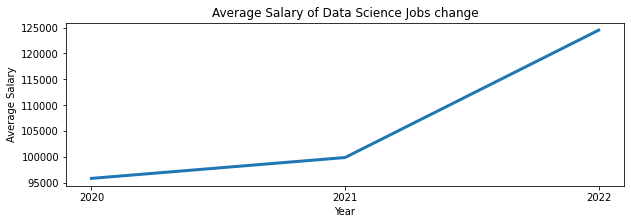

In [49]:
avg_sal_change=data.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10,3))
sns.lineplot(x=avg_sal_change.index,y=avg_sal_change.values,linewidth=3)

xticks=[2020,2021,2022]
plt.xticks(xticks,xticks)
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary of Data Science Jobs change');

- Nhận xét:
    - Mức lương trung bình tăng từ khoảng 96000 USD vào năm 2020 lên 100000 USD vào năm 2021 và cuối cùng là 125000 USD vào năm 2022. Điều này cho thấy một xu hướng tích cực và cho thấy rằng các công việc khoa học dữ liệu đang trở nên có giá trị hơn theo năm tháng.

In [50]:
name_job = ['AI Scientist',
 'Computer Vision Engineer',
 'Data Analyst',
 'Data Architect',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Machine Learning Scientist',
 'NLP Engineer',
 'Research Scientist']
def mean_job(year):
    data_each_year = data[data['work_year'] == year]
    job_salary = np.array([data_each_year['job_title'], data_each_year['salary_in_usd']]).T

    job_salary = pd.DataFrame(job_salary, columns=['job_title', 'salary_in_usd'])

    mean = []
    for name in name_job:
        if name in set(job_salary['job_title']):
            mean.append(job_salary.loc[job_salary['job_title'] == name, 'salary_in_usd'].mean())
        else:
            mean.append(0)
    mean = np.array(mean).round(2)
    return mean 

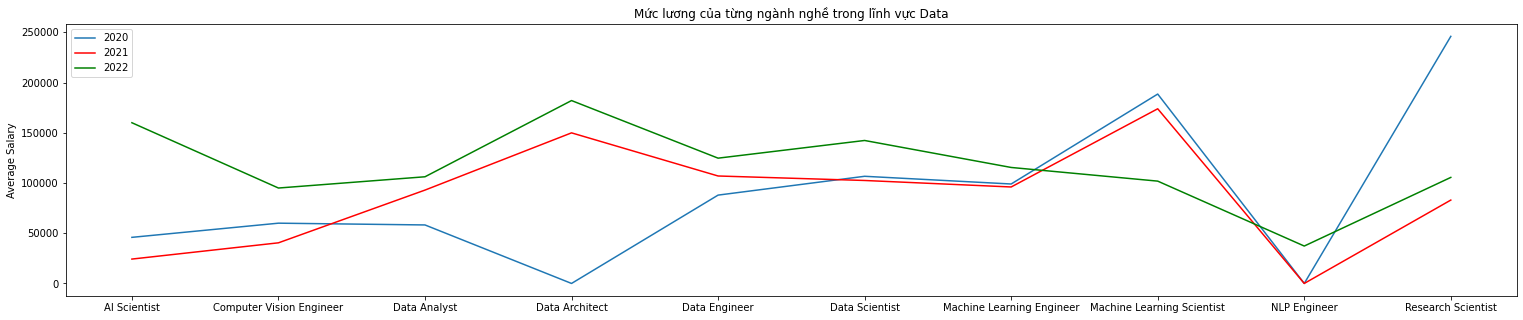

In [51]:
mean2020, mean2021, mean2022 = mean_job(2020) ,mean_job(2021), mean_job(2022)
plt.figure(num = 3, figsize=(26,5))
plt.plot(name_job, mean2020, label = '2020')
plt.plot(name_job, mean2021,color='red', label ='2021')
plt.plot(name_job, mean2022, color='green',label ='2022')
plt.title("Mức lương của từng ngành nghề trong lĩnh vực Data")
plt.ylabel('Average Salary')
plt.legend()
plt.show()

- Nhận xét:
    - Với đa số các nhóm ngành đều có xu hương tăng theo từng năm.
    - Có thể hiểu, với sự phát triển mạnh mẽ của khoa học dữ liệu và khoa học máy tính như hiện nay, những công việc kể trên là những công việc đòi hỏi nguồn nhân lực rất cao trong thời đại ngày nay, nên không chỉ làm trong môi trường trong nước mà dựa vào nguồn vốn đầu tư trực tiếp nước ngoài của các quốc gia ngày càng được đẩy mạnh
    - Với các vị trí Machine Learning Scientist và Research Scientsit, sự giảm đột ngột từ 2020 - 2022 có lẽ vì vào năm 2020, nhu cầu research tăng mạnh vì thức mức lương cũng cao (cao nhất trong các ngành). Khi mà nguồn nhân lực đủ thì vì cung > cầu nên mức lương giảm.

#### b.  Mức lương trung bình của từng nhân viên theo loại nhân viên của từng công ty và theo từng mức độ kinh nghiệm làm việc:

- b1. Mức lương trung bình của từng nhân viên theo từng loại công ty:
     - Ý nghĩa:  Có sự so sánh về mức lương trung bình giữa các loại nhân viên thuộc các quy mô khác nhau của công ty. Từ đó lựa chọn loại hình lao động phù hợp nhất với quy mô mong muốn của công ty.
     - Các bước thực hiện: 
        - Trực quan hóa trong đó: trục hoành là quy mô công ty (company_size), trục tung là lương trung bình (salary_in_usd) và bảng chú thích màu là loại lao động (employment_type).
        - Điều chỉnh các thông số để hình ảnh hiển thị rõ ràng.

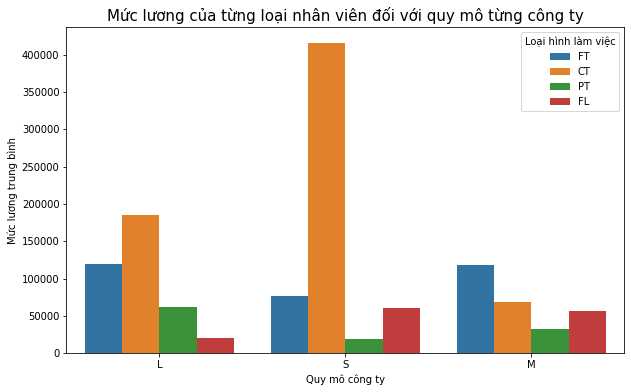

In [52]:
plt.subplots(figsize=(10, 6))
p = sns.barplot(data=data, x='company_size', y='salary_in_usd', hue='employment_type', ci=None)
p.set_title('Mức lương của từng loại nhân viên đối với quy mô từng công ty', fontsize=15)
p.set_xlabel('Quy mô công ty', fontsize=10)
p.set_ylabel('Mức lương trung bình', fontsize=10)
plt.legend(title='Loại hình làm việc')
plt.show()

- Nhận xét:
    - Loại nhân viên hợp đồng ở các công ty nhỏ có mức lương trung bình cao nhất và trên 400.000 USD. Đây cũng là loại cao nhất của hãng lớn nhưng chưa tới 200.000 USD.
    - Loại nhân viên chính thức phù hợp nhất với các công ty vừa vì loại này cao hơn ở quy mô lớn và nhỏ, cũng như cao nhất ở quy mô vừa.
    - Loại hình bán thời gian và tự do với mức lương trung bình được trả ở quy mô vừa và nhỏ; quy mô công ty trung bình tốt hơn một chút so với quy mô nhỏ để thanh toán cho cả hai loại.

-  b2. Mức lương trung bình theo từng mức độ kinh nghiệm làm việc:
    - Ý nghĩa: Có cái nhìn tổng quát về sự thay đổi mức lương của cấp độ kinh nghiệm trong 3 năm (2020, 2021, 2022). Từ đó, đánh giá mức độ ảnh hưởng của kinh nghiệm làm việc đến mức lương.
    - Các bước thực hiện:
        - Xây dựng hàm trích suất trung bình lương theo từng mức trình độ.
        - Biểu diễn bằng biểu đồ đường cho cả 3 năm.

In [53]:
def experandsalary(year):
    year_salary=data.groupby(["work_year","experience_level"])["salary_in_usd"].mean()
    year_salary=year_salary.reset_index()
    year_salary=year_salary[year_salary["work_year"]==year]
    year_salary=year_salary["salary_in_usd"]
    return year_salary
year_salary=experandsalary(2020)
year_salary

0     63648.6000
1    202416.5000
2     85950.0625
3    137240.5000
Name: salary_in_usd, dtype: float64

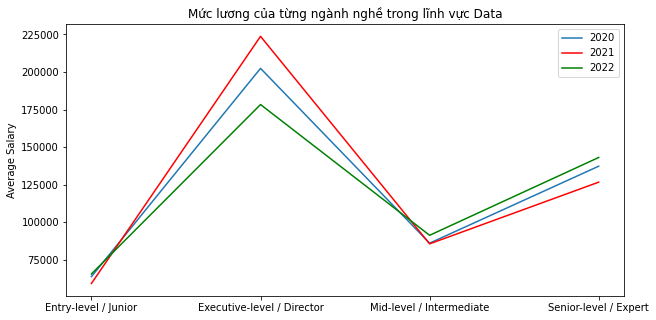

In [54]:
exp = ['Entry-level / Junior',
       'Executive-level / Director',
        'Mid-level / Intermediate',
        'Senior-level / Expert']
mean2020, mean2021, mean2022 = experandsalary(2020) ,experandsalary(2021), experandsalary(2022)
plt.figure(num = 10, figsize=(10,5))
plt.plot(exp, mean2020, label = '2020')
plt.plot(exp, mean2021,color='red', label ='2021')
plt.plot(exp, mean2022, color='green',label ='2022')
plt.title("Mức lương của từng ngành nghề trong lĩnh vực Data")
plt.ylabel('Average Salary')
plt.legend()
plt.show()

- Nhận xét: 
    - Có sự phân hóa rõ rệt giữa mức lương giữa các trình độ chuyên môn. Điều này đúng với lẽ thường vì những người có chuyên môn cao thì sẽ giải quyết được nhiều vấn đề phức tạp hơn. Nhưng ở năm 2022 có sự tiệm cận giữa Senior-level / Expert và  Executive-level / Director, có lẽ sự chênh lệch giữa 2 trình độ này không có quá xa, dẫn đến mức lương giảm xuống ở Executive và tăng lên ở Senior.

#### c. Đâu là nơi lý tưởng để làm việc trong lĩnh vực KHDL?

- Ý nghĩa: Giúp người tìm việc lựa chọn những quốc gia có lĩnh vực Khoa học dữ liệu đang phát triển, sẵn sàng chi trả cho nguồn nhân lực với mức lương hấp dẫn.

- Tiền xử lý:
    - Để trả lời câu hỏi này một cách sinh động nhất, chúng ta sẽ xử lý dữ liệu để có thể hình dung kết quả trên bản đồ thế giới (sử dụng thư viện px.choropleth)
    - Cách xử lý: Để sử dụng được thư viện px.choropleth, để dữ liệu được ánh xạ lên bản đồ thế giới thì tên quốc gia phải nằm trong ISO (Tổ chức tiêu chuẩn hóa quốc tế), vì vậy cần chuyển đổi cột 'company_location' giá trị thành mã ISO.

In [55]:
country_names = coco.convert(names=data['company_location'], to="ISO3")
data['company_location'] = country_names
data['company_location'].unique()

array(['DEU', 'JPN', 'GBR', 'HND', 'USA', 'HUN', 'NZL', 'FRA', 'IND',
       'PAK', 'CHN', 'GRC', 'ARE', 'NLD', 'MEX', 'CAN', 'AUT', 'NGA',
       'ESP', 'PRT', 'DNK', 'ITA', 'HRV', 'LUX', 'POL', 'SGP', 'ROU',
       'IRQ', 'BRA', 'BEL', 'UKR', 'ISR', 'RUS', 'MLT', 'CHL', 'IRN',
       'COL', 'MDA', 'KEN', 'SVN', 'CHE', 'VNM', 'ASM', 'TUR', 'CZE',
       'DZA', 'EST', 'MYS', 'AUS', 'IRL'], dtype=object)

- Các bước thực hiện:
    - Tạo dataframe average_salary gồm 2 thuộc tính 'company_location' và 'mean_salary_in_usd':
        - 'company_location': hiển thị mã quốc gia ISO.
        - 'mean_salary_in_usd': thể hiện mức lương trung bình (trong vòng 3 năm) của các quốc gia tương ứng.
    - Tiến hành trực quan hóa bằng biểu đồ choropleth (thư viện plotly.express) trong đó: giá trị lương trung bình (mean_salary_in_usd) của mỗi quốc gia (company_location) sẽ được hiển thị màu trên bản đồ thế giới.

In [56]:
salary_location_df = data.groupby(['salary_in_usd', 'company_location']).size().reset_index()
average_salary = salary_location_df.groupby('company_location').mean().reset_index()
average_salary.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
average_salary = average_salary[['company_location','mean_salary_in_usd']]
average_salary.head()

,company_location,mean_salary_in_usd
0,ARE,100000.000000
1,ASM,18053.000000
2,AUS,108042.666667
3,AUT,72920.750000
4,BEL,85699.000000


In [57]:
fig = px.choropleth(locations=average_salary['company_location'],
                    color=average_salary['mean_salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(
    title="Average Salary by Company Location", title_x=0.5)

fig.show()

- Nhận xét:
    - Dựa vào hình ảnh trực quan ta có thể thấy các quốc gia có mức lương trung bình rất cao là: Nga (157.5k), Mỹ (148.5981), Úc (108.0427k), Nhật (114.1273k), Canada (101.9085k).
    - Đây đều là những quốc gia phát triển hàng đầu thế giới về mọi lĩnh vực và các quốc gia này sẵn sàng trả mức lương rất hậu hĩnh cho nhân lực ngành Khoa học dữ liệu. Điều đó chứng tỏ Khoa học dữ liệu là lĩnh vực nghề nghiệp quan trọng trong sự phát triển của đất nước và người lao động có thể cân nhắc lựa chọn những quốc gia này để phát triển sự nghiệp và có thu nhập tốt.

### 3. Tổng kết:

#### a. Khó khăn gặp phải: 
- Chưa có nhiều kinh nghiệm khi làm các bài toán về KHDL nên gặp khó khăn trong lúc đặt ra câu hỏi và phân tích trên dữ liệu tìm câu trả lời.
- Chưa biết nên chọn loại trực quan nào có thể mô tả được hết ý nghĩa dữ liệu mình đang phân tích.

#### b. Kiến thức học được: 

- Hiểu được tổng quán về dữ liệu, tận dụng các công cụ để phát huy được chức năng của dữ liệu.
- Quy trình làm bài về KHDL , cách khám phá và phân tích ý nghĩa của dữ liệu.
- Cách sử dụng github để làm việc.

#### c. Nếu có thời gian sẽ: 

- Sẽ tham khảo thêm nhiều bài viết về chủ đề này để có thêm nhiều góc nhìn đến nhiều hướng của dữ liệu.
- Nghiên cứu nhiều hơn về các vai trò cũng như tầm quan trọng của các ngành nghề trong KHDL, để có thể phân tích sâu hơn và đặt được nhiều câu hỏi mang giá trị hơn.